In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from googletrans import Translator
from langdetect import detect
import pycountry
import warnings
from time import time

warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize': (18, 8)}, style='darkgrid')


In [2]:
train_path = "\Genre Classification Dataset\\train_data.txt"
test_path = "\Genre Classification Dataset\\test_data.txt"
y_test_path = "\Genre Classification Dataset\\test_data_solution.txt"

train_data = pd.read_csv(train_path, sep=":::", names=["TITLE", "GENRE", "DESCRIPTION"], engine="python")
test_data = pd.read_csv(test_path, sep=":::", names=["TITLE", "DESCRIPTION"], engine="python")

print(train_data.info())
print(train_data.describe(include='object').T)
print(train_data.isnull().sum())
print(train_data.GENRE.unique())

print(test_data.info())
print(test_data.describe(include='object').T)
print(test_data.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        54214 non-null  object
 1   GENRE        54214 non-null  object
 2   DESCRIPTION  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
None
             count unique                                                top  \
TITLE        54214  54214                      Oscar et la dame rose (2009)    
GENRE        54214     27                                             drama    
DESCRIPTION  54214  54086   Grammy - music award of the American academy ...   

              freq  
TITLE            1  
GENRE        13613  
DESCRIPTION     12  
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64
[' drama ' ' thriller ' ' adult ' ' documentary ' ' comedy ' ' crime '
 ' reality-tv ' ' horror ' ' sport ' ' animation ' ' action ' ' fantasy '
 ' short ' ' sci-fi ' ' music ' '

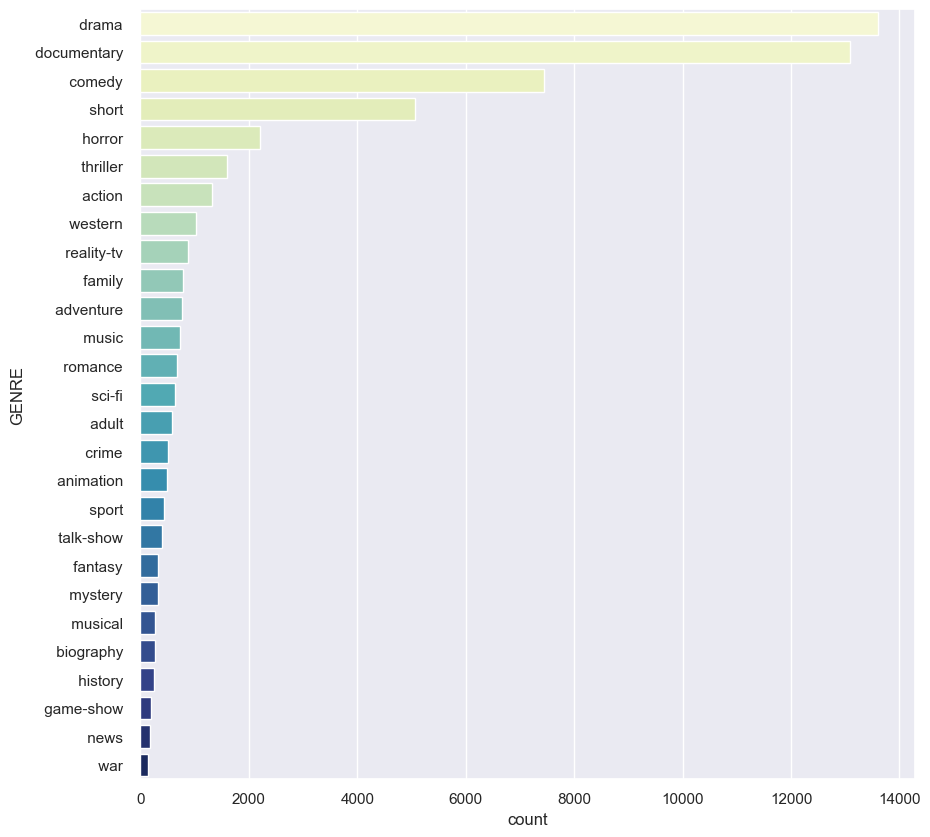

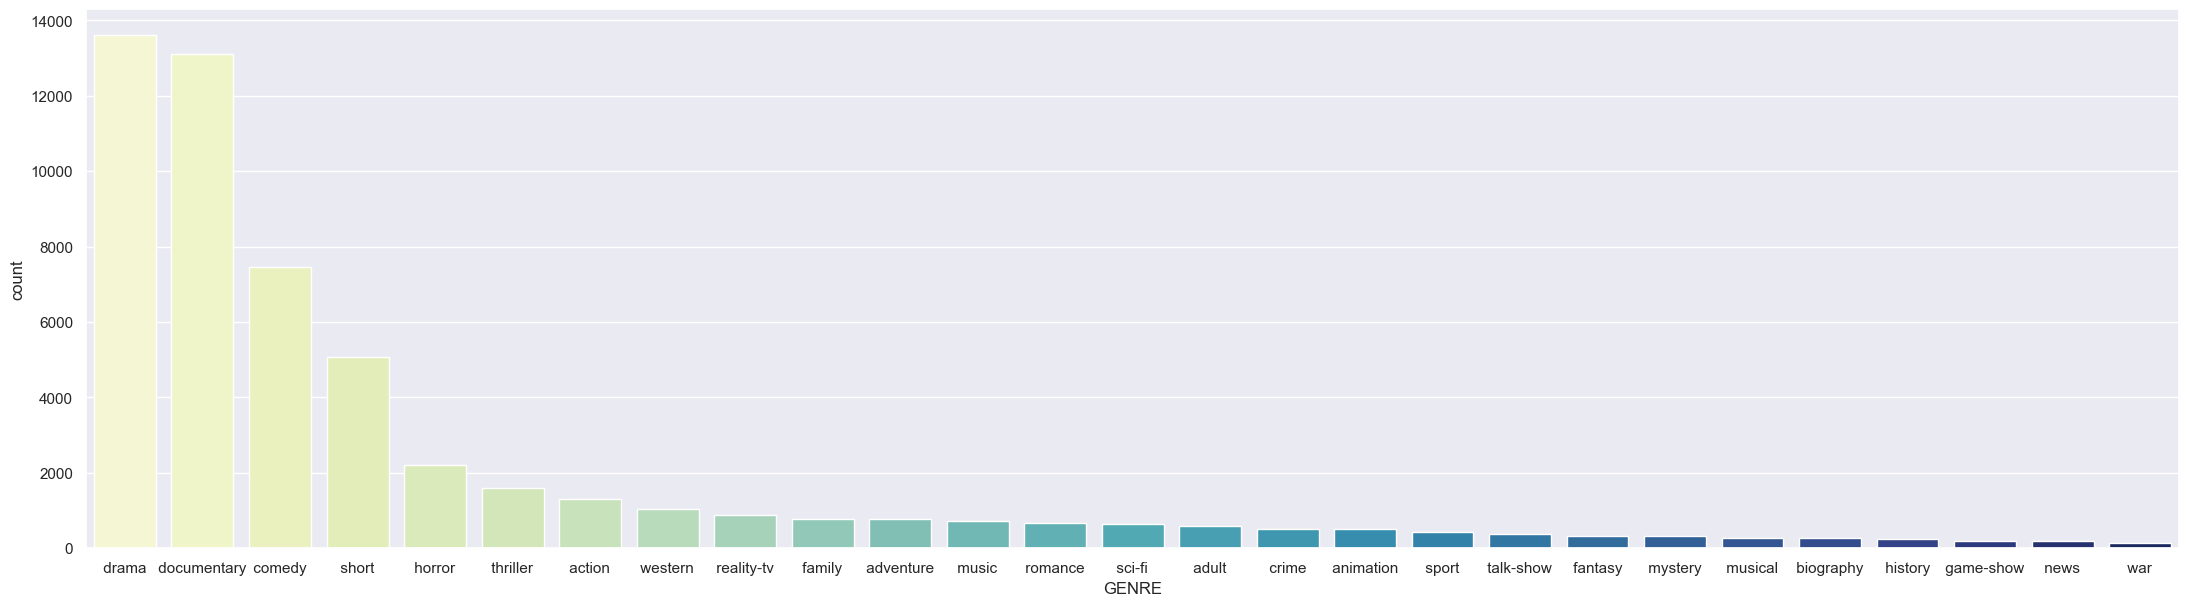

In [3]:
plt.figure(figsize=(10, 10))
sns.countplot(data=train_data, y="GENRE", order=train_data["GENRE"].value_counts().index, palette="YlGnBu")
plt.show()

plt.figure(figsize=(27, 7))
sns.countplot(data=train_data, x="GENRE", order=train_data["GENRE"].value_counts().index, palette="YlGnBu")
plt.show()


In [4]:
nltk.download('stopwords')
nltk.download('punkt')

def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)  # Replace non-characters with a space
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()  # Replace multiple spaces with a single space
    return text

train_data["TextCleaning"] = train_data["DESCRIPTION"].apply(cleaning_data)
test_data["TextCleaning"] = test_data["DESCRIPTION"].apply(cleaning_data)

print(train_data.head())
print(test_data.head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\paray\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\paray\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                TITLE       GENRE  \
1       Oscar et la dame rose (2009)       drama    
2                       Cupid (1997)    thriller    
3   Young, Wild and Wonderful (1980)       adult    
4              The Secret Sin (1915)       drama    
5             The Unrecovered (2007)       drama    

                                         DESCRIPTION  \
1   Listening in to a conversation between his do...   
2   A brother and sister with a past incestuous r...   
3   As the bus empties the students for their fie...   
4   To help their unemployed father make ends mee...   
5   The film's title refers not only to the un-re...   

                                        TextCleaning  
1  listening conversation doctor parents year old...  
2  brother sister past incestuous relationship cu...  
3  bus empties students field trip museum natural...  
4  help unemployed father make ends meet edith tw...  
5  film title refers recovered bodies ground zero...  
              

In [5]:
vectorize = TfidfVectorizer()
x_train = vectorize.fit_transform(train_data["TextCleaning"])
x_test = vectorize.transform(test_data["TextCleaning"])

y_test = pd.read_csv(y_test_path, sep=":::", usecols=[2], header=None).rename(columns={2: 'Actual_Genre'})

x = x_train
y = train_data["GENRE"]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

NB = MultinomialNB(alpha=0.015)
start_time = time()
NB.fit(x_train, y_train)
y_pred_nb = NB.predict(x_val)
print('Naive Bayes Accuracy:', accuracy_score(y_val, y_pred_nb))
end_time = time()
print('Naive Bayes Running Time:', round(end_time - start_time, 2), 'Seconds')


Naive Bayes Accuracy: 0.5397952596144978
Naive Bayes Running Time: 0.67 Seconds
